# Identyfing Toxic Customers in Forex Market

## 1. Loading libraries

In [67]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10)

## 2. Generating fields

In [68]:
# Parameters:
mean = 1.15
std_dev = 0.00075
min_diff = 0.0001
max_diff = 0.0007
fixed_spread = 0.0002
n_days = 365

# Timestamps (365 days every hoour)
transactionTime = pd.date_range(start=pd.Timestamp('2023-11-27'), periods = n_days * 24, freq='H').tolist()

# customerIDs
customerID = np.random.randint(1, 11, size=len(transactionTime))

# Bid, Ask and difference (making sure marketAsk is higher than marketBid)
marketBid = np.random.normal(loc=mean, scale=std_dev, size=len(transactionTime))
marketAsk = marketBid + np.random.uniform(min_diff, max_diff, size=len(transactionTime))
variableSpread = marketAsk - marketBid

# Quoted Price and Mid Price calculation
quotedPrice = marketBid + fixed_spread
midPrice = (marketAsk + marketBid) / 2

np.random.seed(10)
# Random amount values from 1000 to 100000
amount_choices = [100, 1000, 10000, 100000]
amount = np.random.choice(amount_choices, size=len(transactionTime))
random_multiplier = np.random.randint(1, 10, size=len(transactionTime))
amount *= random_multiplier

# Profit
profit = (quotedPrice - midPrice) * amount

### *Why those limits?*
I choosed standard Lot sizes for transactions.
* 100 units - Nano
* 1,000 units - Micro
* 10,000 units - Mini
* 100,000 units - Standard

Multiplied that by 1 to 9 so customer can use different number of Lots.

## 3. Creating DataFrame

In [69]:
# Creating a dataframe
data = {
    'customerID': customerID,
    'transactionTime': transactionTime,
    'marketBid': marketBid,
    'quotedPrice': quotedPrice,
    'marketAsk': marketAsk,
    'variableSpread': variableSpread,
    'midPrice': midPrice,
    'currencyPair': 'EUR/USD',
    'dealtCurrency': 'EUR',
    'amount': amount,
    'profit': profit
}
df = pd.DataFrame(data)

In [73]:
df
#df.head(20)
#df.describe()
df.to_csv('forex_transactions.csv', index=False)

## 4. Price over time plot

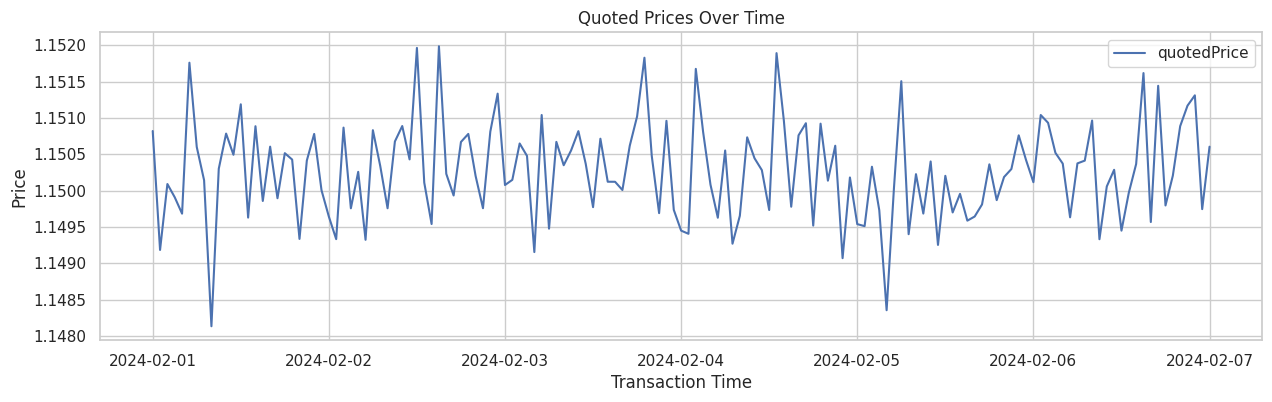

In [77]:
# quotedPrice over time
plt.figure(figsize=(15, 4))
plt.plot(df[(df['transactionTime'] >= '2024-02-01') & (df['transactionTime'] <= '2024-02-07')]['transactionTime'],
         df[(df['transactionTime'] >= '2024-02-01') & (df['transactionTime'] <= '2024-02-07')]['quotedPrice'],
         label='quotedPrice')
plt.title('Quoted Prices Over Time')
plt.xlabel('Transaction Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## 5. Calculating total profit per customer

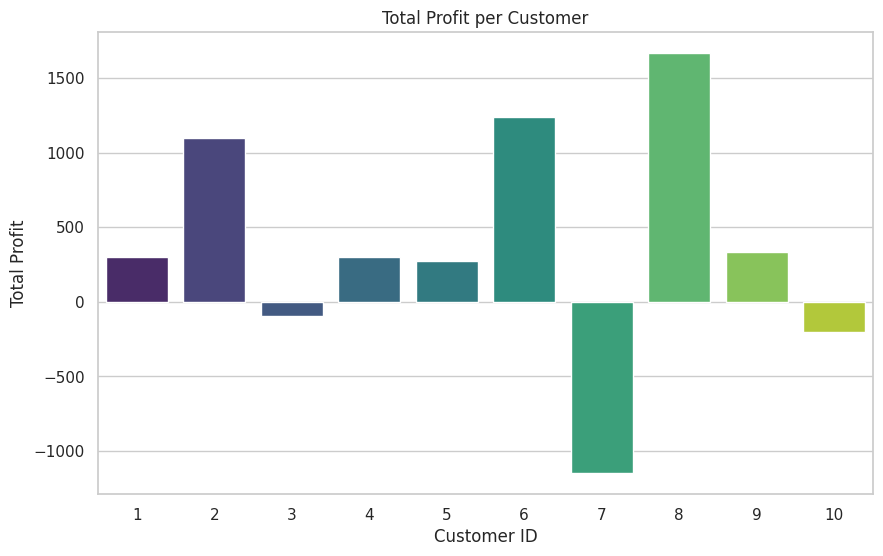

Total profit is: 3766.4


In [78]:
# Calculate total profit for each customer
total_profit = df.groupby('customerID')['profit'].sum().reset_index().sort_values(by='profit', ascending=False)

# Plot total profit by customer
plt.figure(figsize=(10, 6))
sns.barplot(x='customerID', y='profit', data=total_profit, palette='viridis')
plt.title('Total Profit per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Profit')
plt.show()

# Total profit
print('Total profit is:', round(df['profit'].sum(),2))

## 6. Questions

### Why a client can be making market maker lose money?

Toxic customer strategies:

* Widening Spreads:
Customers may artificially widen spreads during periods of market volatility  potentially leading to higher variable spread.

* Triggering stop-loss:
Customers may intentionally triggering stop-loss orders to force liquidation of positions, often at less favorable prices. This can be achieved by briefly moving the market in a way that activates stop-loss orders. It can cause wider spread.

* Quote Stuffing: Rapidly placing and canceling a large number of orders to create confusion or disrupt the operations of other market participants.

* Spoofing: Placing orders with the intent to cancel them before execution, creating a false impression of supply or demand to manipulate market prices.

* Front-Running: Executing trades on advance knowledge of pending orders from other market participants.

* Layering: Placing multiple orders on one side of the market with the intent to cancel them before execution, creating a misleading appearance of supply or demand.

### Does this scenario bring any case for toxicity?

* When the Fixed Spread is lower than actual spread (as a difference between ask and bid) then market maker is losing money - there is not enough money from fixed spread to cover losses. Customers using above strategis can influence the spread (make it wider).

## 7. Reporting ideas

I've prepared QlikSense sheet to show on the meeting, but here are some of ideas:

* Frequency of trades per some period of time (Bar chart with sorted customers with highest frequency in the last hour)
* Average spread of customer transactions
* Profit by customer

Good measures to follow (requires more data):
* Filled and canceled transactions ratio
* The actual spread the customers filled their orders
* Canceled orders of big amount